In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# check missing value 
df.isnull().sum()

# there is no na value 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# bloodpresure,bmi cant be zero 
# so we have to handle this 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
columns=['BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i in columns:
    df[i] = df[i].replace(0,df[i].mean())


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1


In [8]:
# duplicates value check 
df[df.duplicated()]

# no duplicated value 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot: >

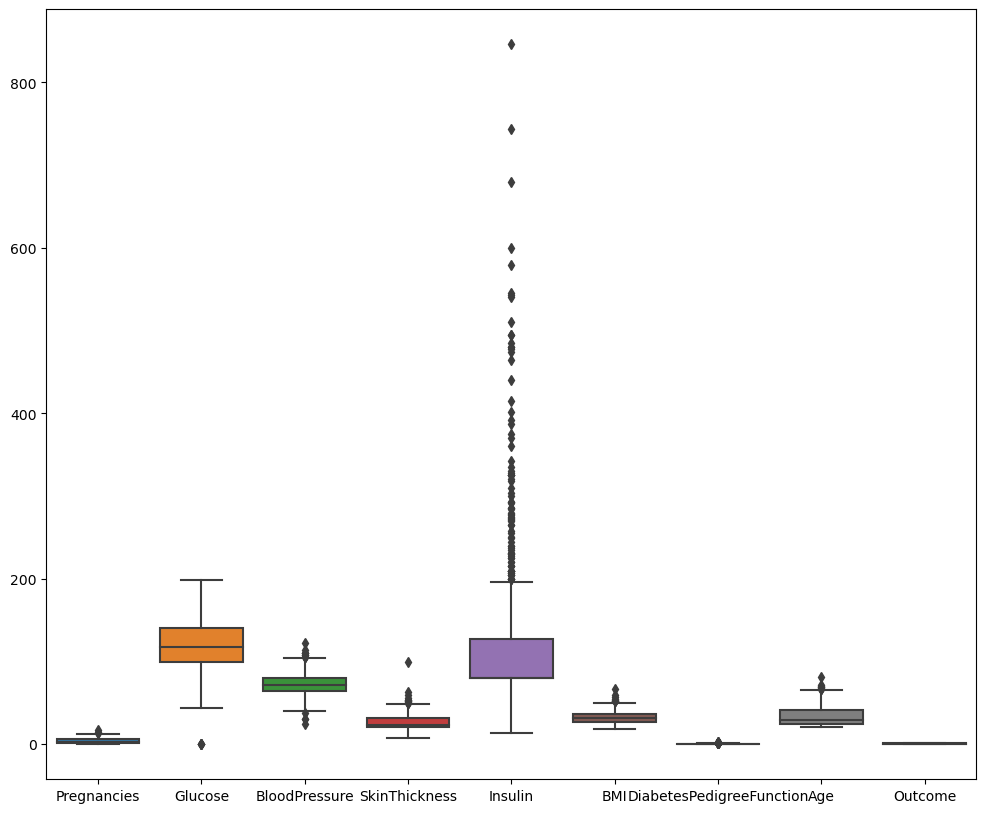

In [9]:
# check outliers 
plt.figure(figsize=(12,10))
sns.boxplot(data=df)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33,1


In [11]:
# indep and depn feature
X = df.iloc[:,:-1]
y = df['Outcome']

In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126,60.0,20.536458,79.799479,30.1,0.349,47


In [13]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
# train test split 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [15]:
# scale down the input 
from sklearn.preprocessing import StandardScaler 


In [16]:
# model creation 
scaler = StandardScaler()

#fit and transform the train data 
x_train_scaled = scaler.fit_transform(x_train)

# transform 
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled

array([[-0.8362943 , -0.80005088, -0.99370784, ..., -1.20340503,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341, -0.01067906, ...,  0.66490433,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.33835532, ...,  1.44097129,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.6143464 ,  1.13618785, ...,  1.91523444,
         1.94892066,  0.42190587],
       [-1.14304979,  0.62368349, -0.24779635, ...,  1.4553429 ,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.12847154,  1.9553785 , ..., -1.40460758,
        -0.60836445, -1.03426754]])

In [25]:
# now model create and traine the model 


## Decision Tree Classifier 

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# model ceation 
dtc = DecisionTreeClassifier()

In [28]:
# hyperparameter tuning  
parameter = {'criterion':['gini', 'entropy', 'log_loss'],
             'splitter':['best', 'random'],
             'max_depth':[1,2,3,4,5],
             'max_features':['sqrt', 'log2']
            }

In [29]:
from sklearn.model_selection import GridSearchCV

# model creation 
clf = GridSearchCV(dtc,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)

clf.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.654 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.648 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.670 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.642 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.654 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=log2, splitte

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [30]:
# best parameter 
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [42]:
# decison tree model 
dtc = DecisionTreeClassifier(criterion='log_loss',max_depth=2,max_features='log2',splitter='best')

# fit the model 
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=2, max_features='log2')

In [43]:
# precit the daya 
y_pred_dtc = dtc.predict(x_test)

In [44]:
y_pred_dtc

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

[Text(0.5, 0.8333333333333334, 'x[5] <= 28.85\nlog_loss = 0.934\nsamples = 537\nvalue = [349, 188]'),
 Text(0.25, 0.5, 'x[1] <= 104.5\nlog_loss = 0.544\nsamples = 184\nvalue = [161, 23]'),
 Text(0.125, 0.16666666666666666, 'log_loss = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.375, 0.16666666666666666, 'log_loss = 0.747\nsamples = 108\nvalue = [85, 23]'),
 Text(0.75, 0.5, 'x[1] <= 127.5\nlog_loss = 0.997\nsamples = 353\nvalue = [188, 165]'),
 Text(0.625, 0.16666666666666666, 'log_loss = 0.84\nsamples = 201\nvalue = [147, 54]'),
 Text(0.875, 0.16666666666666666, 'log_loss = 0.841\nsamples = 152\nvalue = [41, 111]')]

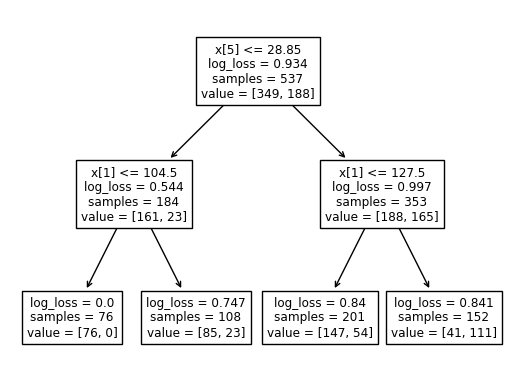

In [45]:
from sklearn import tree
tree.plot_tree(dtc)

In [46]:
# accuracy chechk
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

# confusion matrix 
c_m= confusion_matrix(y_test , y_pred_dtc)
c_m

array([[126,  25],
       [ 36,  44]])

In [47]:
accuracy_score(y_test , y_pred_dtc)

0.7359307359307359

## DTC accuracy is -> 73%

In [48]:
TP =c_m[0][0] 
TN =c_m[1][1]
FP =c_m[0][1]
FN = c_m[1][0]

In [49]:
precission = TP /(TP+FP)
precission

0.8344370860927153

In [50]:
recall = TP /(TP+FN)
recall

0.7777777777777778

In [51]:
# dump the model 
import pickle
pickle.dump(dtc,open('dtc.pkl','wb'))

## Support Vector Classifier

In [18]:
from sklearn.svm import SVC

# model 
svc = SVC()

In [19]:
# hyperparametr tuning 

parameter_2 = {
            'C'     :[0.1,1,10,100],
            'gamma' :[1,0.1,0.01,0.001],
            'kernel':['linear','poly', 'rbf', 'sigmoid']
            }


In [20]:
from sklearn.model_selection import GridSearchCV

# model creation 
clf_svc = GridSearchCV(svc,param_grid=parameter_2,cv=3,scoring='accuracy',verbose=3)

clf_svc.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.793 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.765 total time=   0.0s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.709 total time=   0.0s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.676 total time=   0.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.654 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.693 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.732 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [21]:
# best parameter 
clf_svc.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [34]:
# svc model creation 
svc = SVC(C=0.1,gamma=1,kernel='linear')

svc.fit(x_train_scaled,y_train)

y_pred_svc = svc.predict(x_test_scaled)

In [36]:
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [37]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

# confusion matrix 
c_m= confusion_matrix(y_test , y_pred_svc)
print(c_m)

score  = accuracy_score(y_test , y_pred_svc)

print(score)





[[126  25]
 [ 32  48]]
0.7532467532467533


## SVC accuracy is-> 75.3 %

In [51]:
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [29]:
TP =c_m[0][0] 
TN =c_m[1][1]
FP =c_m[0][1]
FN = c_m[1][0]

In [30]:
precission = TP /(TP+FP)
precission

0.8344370860927153

In [31]:
recall = TP /(TP+FN)
recall

0.7924528301886793

## Naive Biayes 

In [48]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train_scaled,y_train)




GaussianNB()

In [49]:
y_pred_gnb = gnb.predict(x_test_scaled)
y_pred_gnb

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

# confusion matrix 
c_m= confusion_matrix(y_test , y_pred_gnb)
print(c_m)

score  = accuracy_score(y_test , y_pred_gnb)

print(score)





[[120  31]
 [ 31  49]]
0.7316017316017316


## Naive Bayes accuracy -> 73.16%

In [41]:
TP =c_m[0][0] 
TN =c_m[1][1]
FP =c_m[0][1]
FN = c_m[1][0]

In [42]:
precission = TP /(TP+FP)
precission

0.7947019867549668

In [43]:
recall = TP /(TP+FN)
recall

0.7947019867549668

In [52]:
import pickle
pickle.dump(gnb,open('gnb.pkl','wb'))